# Experiment 2: exercise 5
***

## Importing Libraries

In [1]:
import math
import random
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Load Dataset

In [2]:
dataset = load_iris(as_frame=True)

In [3]:
X = dataset.data
y = dataset.target

In [4]:
print("Shape of Features: ", X.shape)
print("Shape of Target: ", y.shape)

Shape of Features:  (150, 4)
Shape of Target:  (150,)


In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

## Data Scaling

In [10]:
scaler = MinMaxScaler()

In [11]:
X = scaler.fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Activation Functions

In [12]:
def sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def sigmoid_d(x):
    return 1/2 * (1 - x**2)

def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - (x ** 2)

def step(x):
    return np.heaviside(x, 1)

def step_d(x):
    return NotImplemented

def relu(x):
    return max(0, x)

def relu_d(x):
    return int(x >= 0)

## Perceptron

In [13]:
class Perceptron:
    def __init__(self, rate=0.2, min_error=0.01, act=sigmoid, act_d=sigmoid_d, seed=1, scale=1):
        
        #learning_rate
        self.rate = rate
        #activation function
        self.act = act
        #derivative of the activation function
        self.act_d = act_d
        #minimum error
        self.min_error = min_error
        #random state
        self.random_state = np.random.RandomState(seed)
        #scale for weight and bias
        self.scale = scale

    def fit(self, X, y, epochs, export='plot.png'):
        
        #number of data
        n = X.shape[0]
        #number of features
        m = X.shape[1]
        #initial bias
        self.b = self.random_state.random() / self.scale
        #initial weights
        self.w = self.random_state.random((1, m)) / self.scale
        
        # loss error and MSE list
        errors = []
        MSEs = []

        for epoch in range(epochs):
            error = 0
            mse = 0
            for i in range(n):
                
                #output for each data X
                o = self.predict(X[i])
                #updating weight and bias
                self.w = self.w + self.rate * (y[i] - o) * self.act_d(o) * X[i]
                self.b = self.b + self.rate * (y[i] - o) * self.act_d(o)
                #calculating loss error and MSE for each data
                error += 1/2 * (y[i] - o)**2
                mse += (y[i] - o)**2
            
            #add loss error and mse for each iteration to the list
            errors.append(error)
            MSEs.append(mse / n)
            print(f'> {epoch}\t{error}')
            
            #check error with minimum error
            if error < self.min_error:
                break
        #plot loss error and mse
        fig, ax = plt.subplots(2 , figsize=(10,10))
        ax[0].plot(errors)
        ax[1].plot(MSEs)
        
        ax[0].set_ylabel("loss error")
        ax[0].set_xlabel("epoch")
        ax[1].set_ylabel("MSE")
        ax[1].set_xlabel("epoch")
        
        fig.savefig(export)
    
    #output function
    def predict(self, x):
        return self.act(np.dot(self.w, x) + self.b)

> 0	[2.71414499]
> 1	[2.79771344]
> 2	[2.13024256]
> 3	[1.85455513]
> 4	[1.73829183]
> 5	[1.68629735]
> 6	[1.66074456]
> 7	[1.64686889]
> 8	[1.63836457]
> 9	[1.63215333]
> 10	[1.62702775]
> 11	[1.62220626]
> 12	[1.61737423]
> 13	[1.61236648]
> 14	[1.60729316]
> 15	[1.60221077]
> 16	[1.59719288]
> 17	[1.59232672]
> 18	[1.58764294]
> 19	[1.58316657]
> 20	[1.57890979]
> 21	[1.57488508]
> 22	[1.57111199]
> 23	[1.5675956]
> 24	[1.56435021]
> 25	[1.56138484]
> 26	[1.55867659]
> 27	[1.55619811]
> 28	[1.55392817]
> 29	[1.55184906]
> 30	[1.54994532]
> 31	[1.54820301]
> 32	[1.54660945]
> 33	[1.54515293]
> 34	[1.54382264]
> 35	[1.54260859]
> 36	[1.5415015]
> 37	[1.54049279]
> 38	[1.53957453]
> 39	[1.53873937]
> 40	[1.53798052]
> 41	[1.53729172]
> 42	[1.53666718]
> 43	[1.53610155]
> 44	[1.53558992]
> 45	[1.53512775]
> 46	[1.53471087]
> 47	[1.53433541]
> 48	[1.53399785]
> 49	[1.53369493]
> 50	[1.53342364]
> 51	[1.53318123]
> 52	[1.53296518]
> 53	[1.53277315]
> 54	[1.53260301]
> 55	[1.5324528]
> 56	

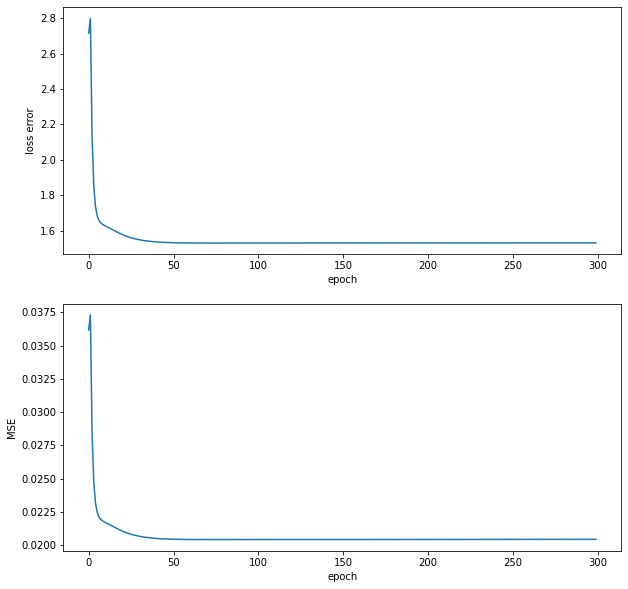

In [14]:
clf = Perceptron(act=relu, act_d=relu_d)
clf.fit(X, y, 300, export=f'mse.png')